In [2]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('iris_dataset.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


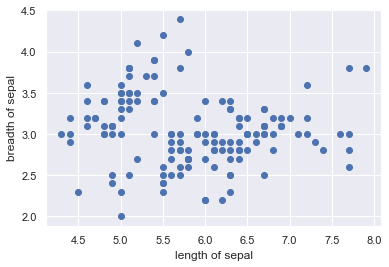

In [5]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel('length of sepal')
plt.ylabel('breadth of sepal')
plt.show()

In [6]:
data=df.copy()
kmeans=KMeans(2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [7]:
cluster=df.copy()
cluster['cluster_predict']=kmeans.fit_predict(data)

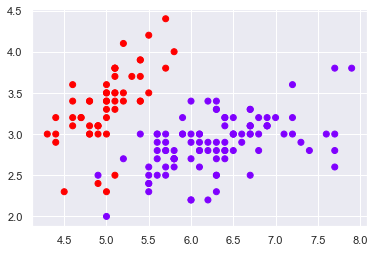

In [8]:
plt.scatter(cluster['sepal_length'],cluster['sepal_width'],c=cluster['cluster_predict'],cmap='rainbow')

# Standardize the variables

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(df)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering (scaled data)

In [10]:
kmeans_scaled=KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [11]:
scaled=data.copy()
scaled['scaled_predict']= kmeans_scaled.fit_predict(x_scaled)

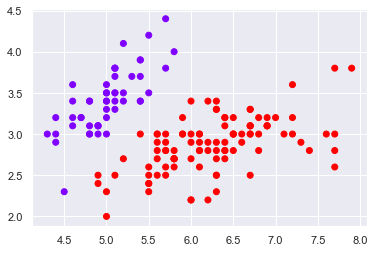

In [12]:
plt.scatter(scaled['sepal_length'],scaled['sepal_width'],c=scaled['scaled_predict'],cmap='rainbow')

# Elbow Method

In [13]:
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss


[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.61550694959811,
 91.12763977985172,
 80.20433441381103,
 70.88546993521874,
 63.154892549068,
 54.2887722825504]

Text(0, 0.5, 'Within-cluster Sum of Squares')

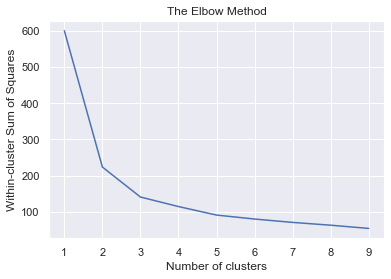

In [14]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [44]:
kmeans_scaled5=KMeans(3)
kmeans_scaled5.fit(x_scaled)

KMeans(n_clusters=3)

In [45]:
scaled['scaled_predict5']=kmeans_scaled5.fit_predict(x_scaled)

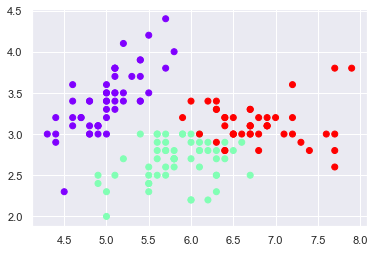

In [46]:
plt.scatter(scaled['sepal_length'],scaled['sepal_width'],c=scaled['scaled_predict5'],cmap='rainbow')

# Compare your solutions to the original iris dataset

In [38]:
real=pd.read_csv('iris_with_answers.csv')

In [39]:
real

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
real['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
real['species']=real['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [42]:
real

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


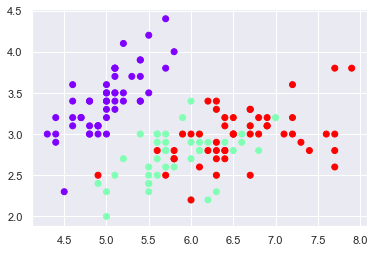

In [43]:
 plt.scatter(real['sepal_length'],real['sepal_width'],c=real['species'],cmap='rainbow')

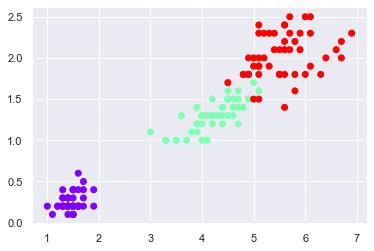

In [47]:
plt.scatter(real['petal_length'],real['petal_width'],c=real['species'],cmap='rainbow')

In [48]:
pkmeans=KMeans(3)
pkmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [49]:
scaled['petal_preedict']=pkmeans.fit_predict(x_scaled)

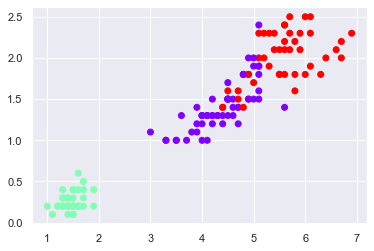

In [53]:
plt.scatter(scaled['petal_length'],scaled['petal_width'],c=scaled['petal_preedict'],cmap='rainbow')

This shows us that:

The Elbow method is imperfect (we might have opted for 2 or even 4)
K-means is very useful in moments where we already know the number of clusters - in this case: 3
Biology cannot be always quantified (or better).. quantified with k-means! Other methods are much better at that